In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq, ifft

filepath = "input_1.wav"  # Replace with your file path
samplerate, data = wavfile.read(filepath)

In [2]:
data = data / np.max(np.abs(data))

signal_length = len(data)

print(f"Properties of File - {filepath}")

# duration = num samples / sample rate, rounded to 3 places
print(f"Duration: {(len(data) / samplerate):.3f} seconds") 

# the number of channels is determined by the number of dimensions of the data
print(f"Number of channels: {len(data.shape)}")

print(f"Sample rate: {samplerate} Hz")

print(f"Signal length in samples: {signal_length}")

print(f"Bit depth: {data.dtype.itemsize * 8}")

# x-axis in seconds
time_axis = np.arange(len(data)) / samplerate

Properties of File - input_1.wav
Duration: 4.000 seconds
Number of channels: 1
Sample rate: 48000 Hz
Signal length in samples: 192000
Bit depth: 64


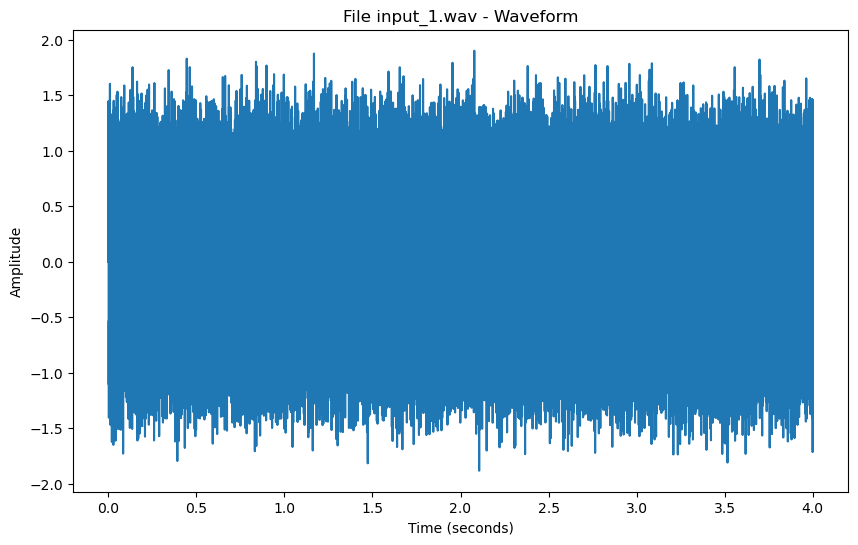

In [19]:
plt.figure(figsize=(10, 6))
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title(f"File {filepath} - Waveform")
plt.plot(time_axis, data)
plt.savefig("1_1_a.png", format="png", bbox_inches="tight", dpi=300)
plt.show()

In [38]:
signal_length_padded

262144

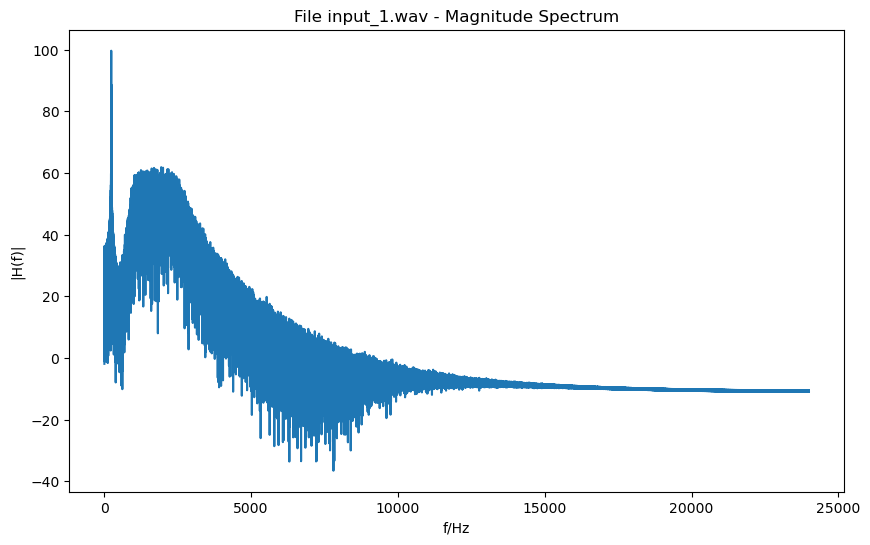

In [39]:
signal_length_padded = 2 ** int(np.ceil(np.log2(signal_length)))

X = fft(data, signal_length_padded)
Xabs = np.abs(X[:signal_length_padded // 2])
XabsdB = 20 * np.log10(Xabs + 1e-10)

frequencies = fftfreq(signal_length_padded, 1/samplerate)[:signal_length_padded // 2]
plt.figure(figsize=(10, 6))
plt.xlabel("f/Hz")
plt.ylabel("|H(f)|")
plt.title(f"File {filepath} - Magnitude Spectrum")
plt.plot(frequencies, XabsdB)
plt.savefig("1_1_b.png", format="png", bbox_inches="tight", dpi=300)
plt.show()

In [40]:
np.argmax(XabsdB) * samplerate / signal_length_padded

234.0087890625

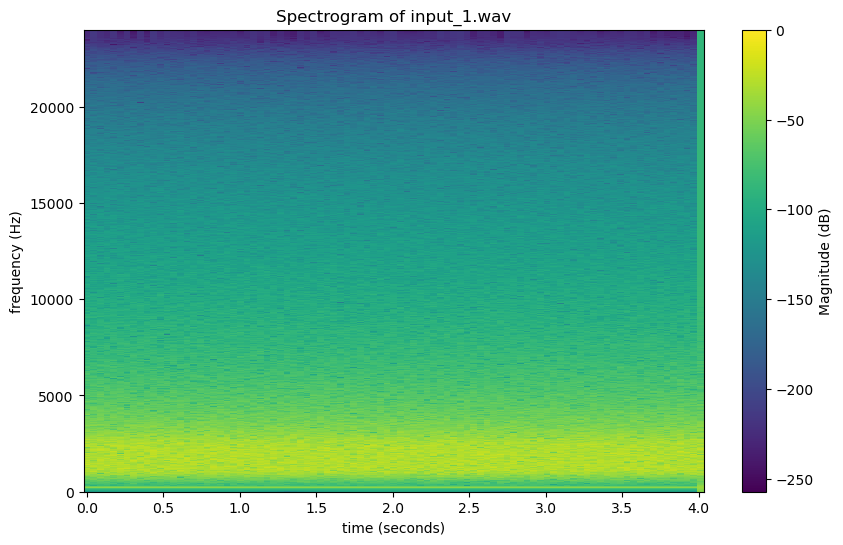

In [49]:
# 4 Short-Time Fourier Transform

## 4.1 Load Wave File
from scipy.io import wavfile

filepath = "input_1.wav"
samplerate, data = wavfile.read(filepath)

## 4.2 Calculate the STFT
from scipy.fft import fft
from scipy.signal.windows import hann
import numpy as np

def stft(input_signal, window_function, window_size, hop_size):

    # pad the input signal with 0s at the end
    input_signal_pad_length = (window_size - (len(input_signal) % hop_size)) % hop_size
    input_signal_padded = np.pad(input_signal, (0, input_signal_pad_length))

    num_frames = int((len(input_signal_padded) - window_size) / hop_size + 1)

    # fill the stft matrix with 0s
    stft_matrix = np.zeros([num_frames, window_size], dtype=complex)

    for n in range(num_frames):
        
        # multiply the frame by the window function
        current_frame = np.multiply(window_function(window_size), input_signal_padded[n*hop_size : ((n*hop_size) + window_size)])
        
        # compute the fft of each frame and add it to the matrix
        stft_matrix[n, :] = fft(current_frame)

    return stft_matrix, num_frames, len(input_signal_padded)

# set the parameters of the stft function
window_size = 4096
hop_size = 2048
window_function = hann
ans, num_frames, padded_signal_length = stft(data, window_function, window_size, hop_size)

# ## 4.3 Plot and Interpret
import matplotlib.pyplot as plt

# we use np.abs ignore the phase
S = np.abs(ans[:, :window_size//2])

# x axis = time
times = np.linspace(0, (padded_signal_length / samplerate), num_frames)

# y axis = frequencies
frequencies = np.linspace(0, samplerate//2, window_size//2)

# Convert to dB scale
S_dB = 20 * np.log10(S) 
# Normalize so the maximum value is 0 dB
S_dB -= np.max(S_dB)  

plt.figure(figsize=(10,6))

# need to transpose the matrix because
# plt.colormesh takes the first argument as y
# and the second as x
plt.pcolormesh(times, frequencies, S_dB.T, shading='auto')
plt.title(f"Spectrogram of {filepath}")
plt.xlabel("time (seconds)")
plt.ylabel("frequency (Hz)")
plt.colorbar(label="Magnitude (dB)")
# plt.savefig("1_1_e.png", format="png", bbox_inches="tight", dpi=300)
plt.show()